In [25]:
from PIL import Image
import matplotlib.pyplot as plt

In [28]:
import torch
import torchvision
torchvision.__version__, torch.__version__

('0.7.0', '1.6.0')

### Some Models
https://pytorch.org/docs/stable/torchvision/models.html

In [30]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
                                        pretrained=True)

In [71]:
images, boxes = torch.rand(4,3,600,1200), torch.rand(4,2,4)

labels = torch.randint(1,91,(4,2))

labels

images = [e for e in images]

targets = []

for i in range(len(images)):
    d = {}
    d['boxes'] = boxes[i]
    d['labels'] = labels[i]
    targets.append(d)

model(images, targets)

ValueError: All bounding boxes should have positive height and width. Found invaid box [0.026290198788046837, 0.251305490732193, 0.7191632986068726, 0.053910426795482635] for target at index 0.

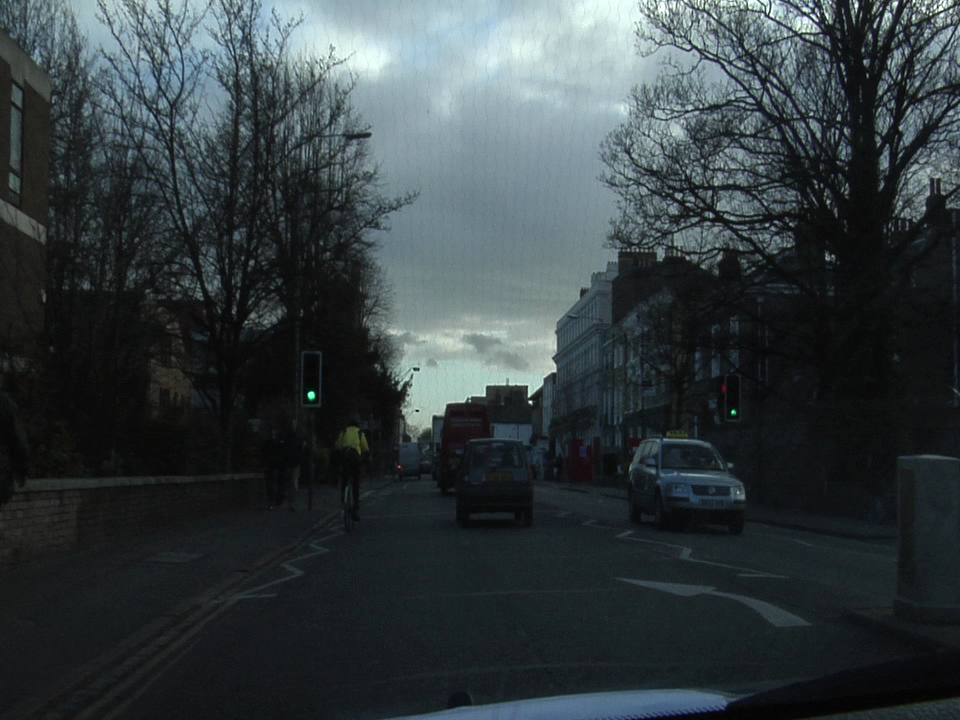

In [73]:
img

### Prediction with camvid video

In [75]:
import numpy as np

In [76]:
img_t = torch.tensor(np.array(img), dtype=)

In [84]:
from torchvision import transforms

In [90]:
im = transforms.ToTensor()(img).unsqueeze_(0)

In [91]:
type(im)

torch.Tensor

In [92]:
im.shape

torch.Size([1, 3, 720, 960])

In [94]:
# model.eval()
pred = model(im)

In [99]:
pred[0]['boxes'][0]

tensor([301.0832, 351.1842, 323.1507, 406.7140], grad_fn=<SelectBackward>)

In [107]:
list_boxes = pred[0]['boxes'].tolist()
print(len(list_boxes))
list_boxes[:3]

49


[[301.08319091796875, 351.1841735839844, 323.1507263183594, 406.7140197753906],
 [332.32305908203125, 416.8714904785156, 370.0729064941406, 522.681884765625],
 [624.8900146484375, 436.9277648925781, 748.8983764648438, 534.0490112304688]]

In [111]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

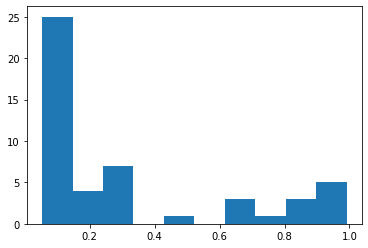

In [124]:
plt.hist(pred[0]['scores'].detach().tolist());

In [125]:
pred[0]['scores']

tensor([0.9910, 0.9897, 0.9801, 0.9651, 0.9563, 0.8607, 0.8571, 0.8183, 0.7821,
        0.7056, 0.6914, 0.6284, 0.5106, 0.3309, 0.3206, 0.3054, 0.2870, 0.2751,
        0.2723, 0.2487, 0.2224, 0.2046, 0.2003, 0.1937, 0.1349, 0.1343, 0.1342,
        0.1246, 0.1223, 0.1217, 0.1129, 0.1094, 0.1090, 0.1057, 0.1034, 0.1016,
        0.0984, 0.0959, 0.0955, 0.0842, 0.0839, 0.0776, 0.0676, 0.0651, 0.0614,
        0.0578, 0.0568, 0.0540, 0.0532], grad_fn=<IndexBackward>)

In [113]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [126]:
len(COCO_INSTANCE_CATEGORY_NAMES)

91

In [116]:
label_names = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in pred[0]['labels']]
label_names[:6]

['traffic light', 'person', 'car', 'truck', 'traffic light', 'car']

In [112]:
pred[0]['labels']

tensor([10,  1,  3,  8, 10,  3,  1,  1,  8,  3,  2,  3,  1,  1,  1, 27,  1, 31,
        10,  3, 10,  1,  1, 27,  1,  1,  1,  1,  3,  1,  8,  3,  1,  3,  1, 31,
        31,  1,  8,  1, 27,  3,  1,  1,  6,  3,  3,  8,  1])

In [117]:
[list_boxes[0][e] for e in (0,2)]

[301.08319091796875, 351.1841735839844, 323.1507263183594, 406.7140197753906]

car


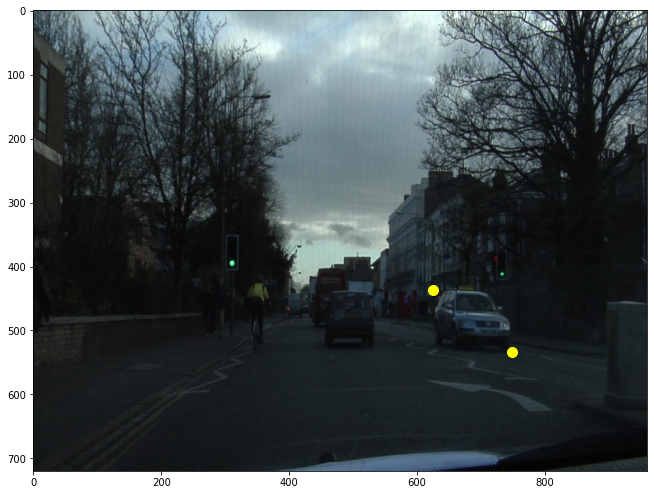

In [121]:
target_ind = 2

plt.figure(figsize=(11,11))
plt.imshow(np.array(img))

print(label_names[target_ind])

plt.scatter([list_boxes[target_ind][e] for e in (0,2)], 
            [list_boxes[target_ind][e] for e in (1,3)],
            c= 'yellow', s=100)

### Score on Laptop images

In [149]:
inf_img_1 = Image.open('../panera1.jpg')
inf_img_2 = Image.open('../panera2.jpg')

factor = 0.2
new_size = [int(e * factor) for e in inf_img_1.size]
inf_img_1 = inf_img_1.resize(new_size)
inf_img_2 = inf_img_2.resize(new_size)

inf_img_1_t = transforms.ToTensor()(inf_img_1).unsqueeze_(0)
inf_img_2_t = transforms.ToTensor()(inf_img_2).unsqueeze_(0)

inf_img_1_t.shape

In [156]:
t0 = time.time()
pred_1 = model(inf_img_1_t)
print(f' inference time: {round(time.time() - t0, 1)} secs')

 inference time: 25.0 secs


In [162]:
t0 = time.time()
pred_2 = model(inf_img_2_t)
print(f' inference time: {round(time.time() - t0, 1)} secs')

 inference time: 9.3 secs


### Plot Results

In [188]:
from matplotlib import patches

labels_2 = [COCO_INSTANCE_CATEGORY_NAMES[e] 
            for e in pred_2[0]['labels']]

boxes_2 = pred_2[0]['boxes'].detach().tolist()

In [193]:
pred_2[0]['scores']

tensor([0.9985, 0.1414, 0.0848, 0.0650], grad_fn=<IndexBackward>)

In [202]:
pred_2[0]['labels'][target_ind]

tensor(1)

In [204]:
COCO_INSTANCE_CATEGORY_NAMES[pred_2[0]['labels'][target_ind].item()]

'person'

In [208]:
type(inf_img_2)

PIL.Image.Image

In [213]:
from copy import copy

In [ ]:
preds

Class: person
Score: 0.15069043636322021
[219, 116, 226, 135]


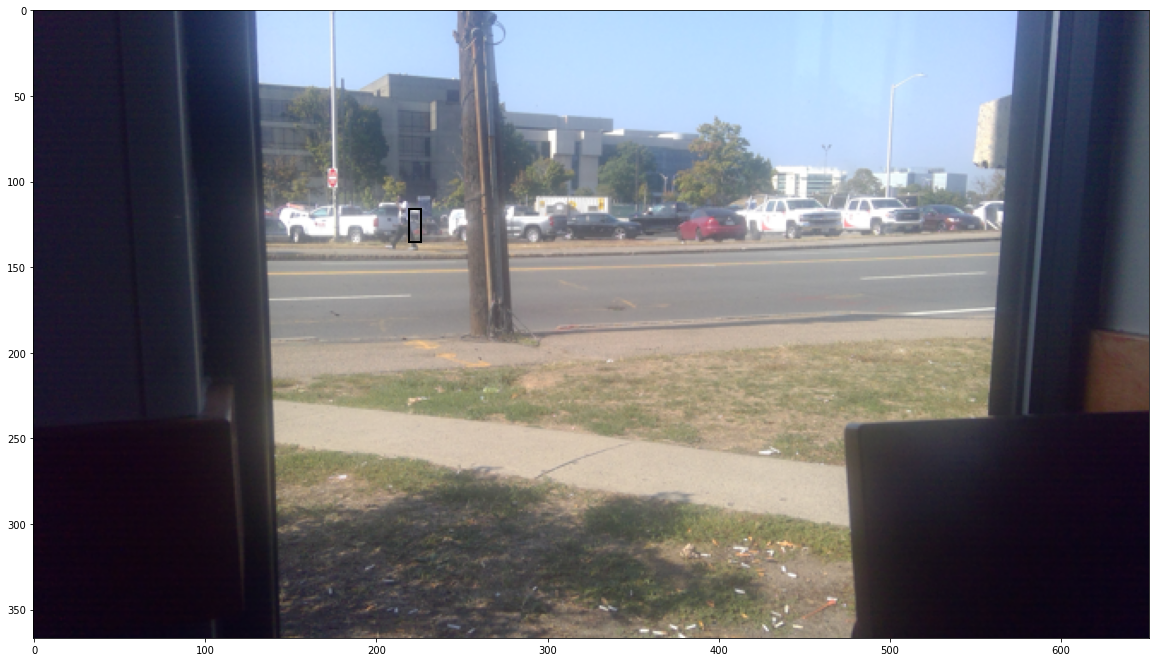

In [235]:
img = inf_img_1.copy()
pred = copy(pred_1)

target_ind = 40

bb = pred[0]['boxes'][target_ind]
bb = [int(e) for e in  bb]

print(f'Class: {COCO_INSTANCE_CATEGORY_NAMES[pred[0]["labels"][target_ind].item()]}')
print(f'Score: {pred[0]["scores"][target_ind].item()}')
print(bb)

rect = patches.Rectangle(bb[:2], bb[2] - bb[0] , bb[3] - bb[1],
                        fill=False, lw=2)

plt.figure(figsize=(20, 20))
ax = plt.subplot()
ax.imshow(np.array(img), )
ax.add_patch(rect);

In [229]:
label_names

['traffic light',
 'person',
 'car',
 'truck',
 'traffic light',
 'car',
 'person',
 'person',
 'truck',
 'car',
 'bicycle',
 'car',
 'person',
 'person',
 'person',
 'backpack',
 'person',
 'handbag',
 'traffic light',
 'car',
 'traffic light',
 'person',
 'person',
 'backpack',
 'person',
 'person',
 'person',
 'person',
 'car',
 'person',
 'truck',
 'car',
 'person',
 'car',
 'person',
 'handbag',
 'handbag',
 'person',
 'truck',
 'person',
 'backpack',
 'car',
 'person',
 'person',
 'bus',
 'car',
 'car',
 'truck',
 'person']

In [ ]:
dls

In [157]:
pred_1

[{'boxes': tensor([[375.3057, 115.5246, 418.9800, 136.7342],
          [518.2375, 114.1654, 554.7936, 130.0854],
          [549.0076, 112.0108, 567.2283, 129.2160],
          [309.2365, 118.3707, 355.3170, 135.4159],
          [346.9306, 112.7133, 386.6440, 132.1230],
          [205.0426, 111.7891, 226.2448, 140.8496],
          [242.1937, 116.2773, 253.7562, 134.6877],
          [274.8192, 114.8691, 307.5934, 136.5571],
          [413.3260, 109.1721, 472.2408, 133.7741],
          [471.3833, 109.1938, 518.7385, 132.2718],
          [149.0796, 113.8276, 200.3250, 136.3922],
          [440.1584, 113.2375, 475.5309, 134.3775],
          [171.9232,  92.8012, 177.6496, 104.2813],
          [140.6545, 114.4921, 174.7267, 136.1026],
          [198.4671, 113.2833, 227.2131, 133.4897],
          [473.9238, 240.8354, 639.4899, 358.4781],
          [298.3405, 117.2292, 315.5314, 133.8365],
          [242.5088, 115.8868, 306.8749, 136.7595],
          [411.0708, 111.3698, 549.9210, 132.6312],
   

In [ ]:
plt.imshow(inf_img_1)

In [ ]:
plt.ad

### Explore existing datasets

In [5]:
!ls ~/.fastai/data/camvid/images | wc -l

702


In [6]:
!ls ~/.fastai/data/camvid/images | head -n 10

0001TP_006690.png
0001TP_006720.png
0001TP_006750.png
0001TP_006780.png
0001TP_006810.png
0001TP_006840.png
0001TP_006870.png
0001TP_006900.png
0001TP_006930.png
0001TP_006960.png


In [20]:
p = '/home/user/.fastai/data/camvid/images/'
fns = os.listdir(p)
fn = fns[20]
# fn = '0001TP_006960.png'

In [23]:
img = Image.open(p + fn)

In [24]:
img.size

(960, 720)

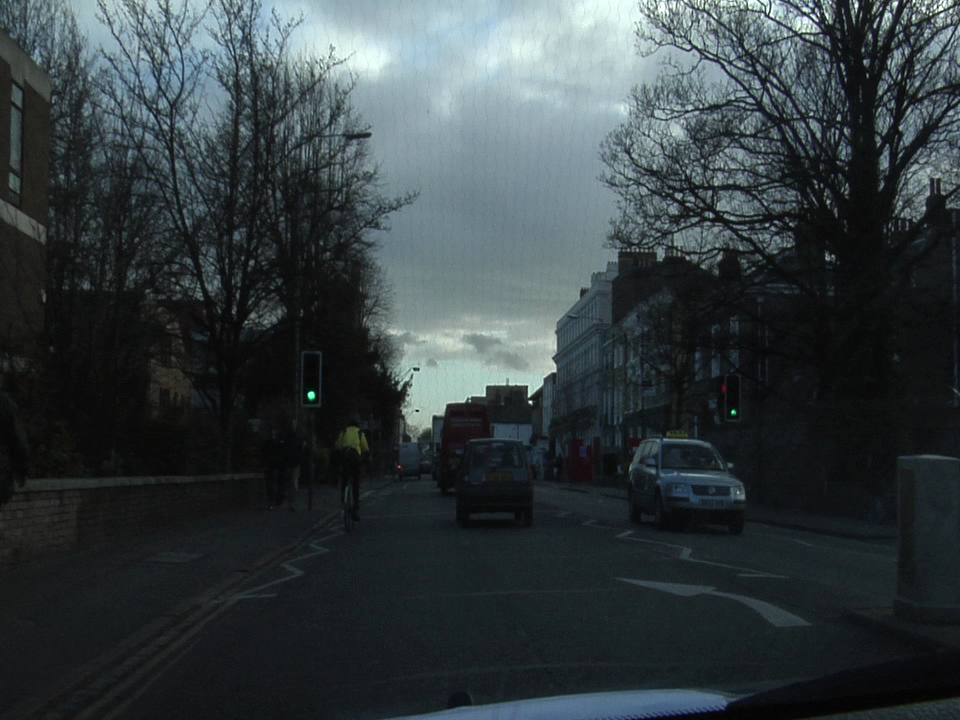

In [22]:
img

### My image

In [127]:
import cv2

In [128]:
cam = cv2.VideoCapture(0)
while(cam.isOpened()):
    grabbed, frame = camera.read()
    break
    key = cv2.waitKey(1)
    
cam.release()

In [129]:
grabbed

NameError: name 'grabbed' is not defined